In [1]:
from seisLM.data_pipeline.foreshock_aftershock_dataset import (
  # create_foreshock_aftershock_dataloaders,
  create_foreshock_aftershock_datasets
)

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datasets = create_foreshock_aftershock_datasets(
  num_classes=9,
  event_split_method='random'
  # event_split_method='temporal'
)

Seed set to 42
Seed set to 42


In [39]:
  X_train, y_train = datasets['train']['X'], datasets['train']['y']
  # X_val, y_val = datasets['val']['X'], datasets['val']['y']
  # X_test, y_test = datasets['test']['X'], datasets['test']['y']

  mean, std = X_train.mean(), X_train.std()
  X_train_processed = (X_train - mean) / std
  # X_val = (X_val - mean) / std
  # X_test = (X_test - mean) / std

  mean0, std0 = X_train.mean(axis=0, keepdims=True), X_train.std(axis=0, keepdims=True)
  X_train_processed0 = (X_train - mean0) / std0




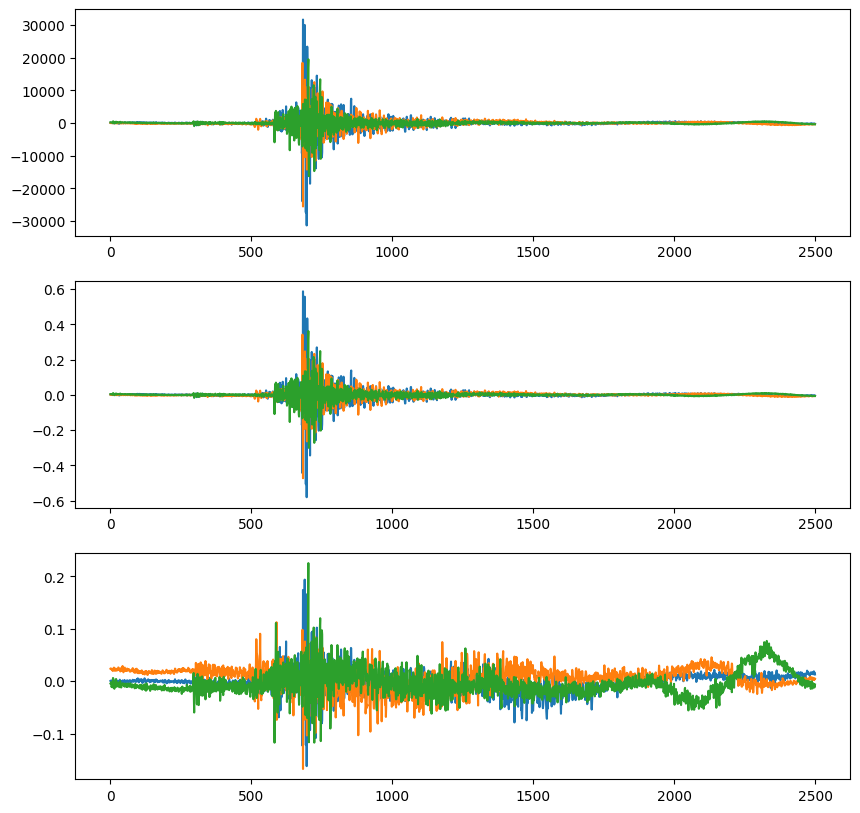

In [40]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
axes[0].plot(X_train[0])
axes[1].plot(X_train_processed[0])
axes[2].plot(X_train_processed0[0])


# plt.plot(
#   ((datasets['train']['X'] - train_mean) / train_var)[0])


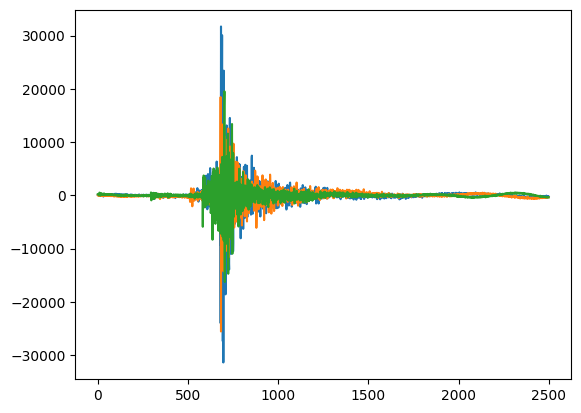

In [34]:
plt.plot((datasets['train']['X'])[0])


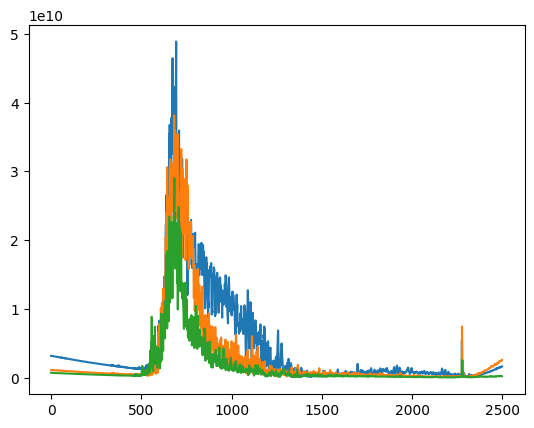

In [27]:
plt.plot(train_var)

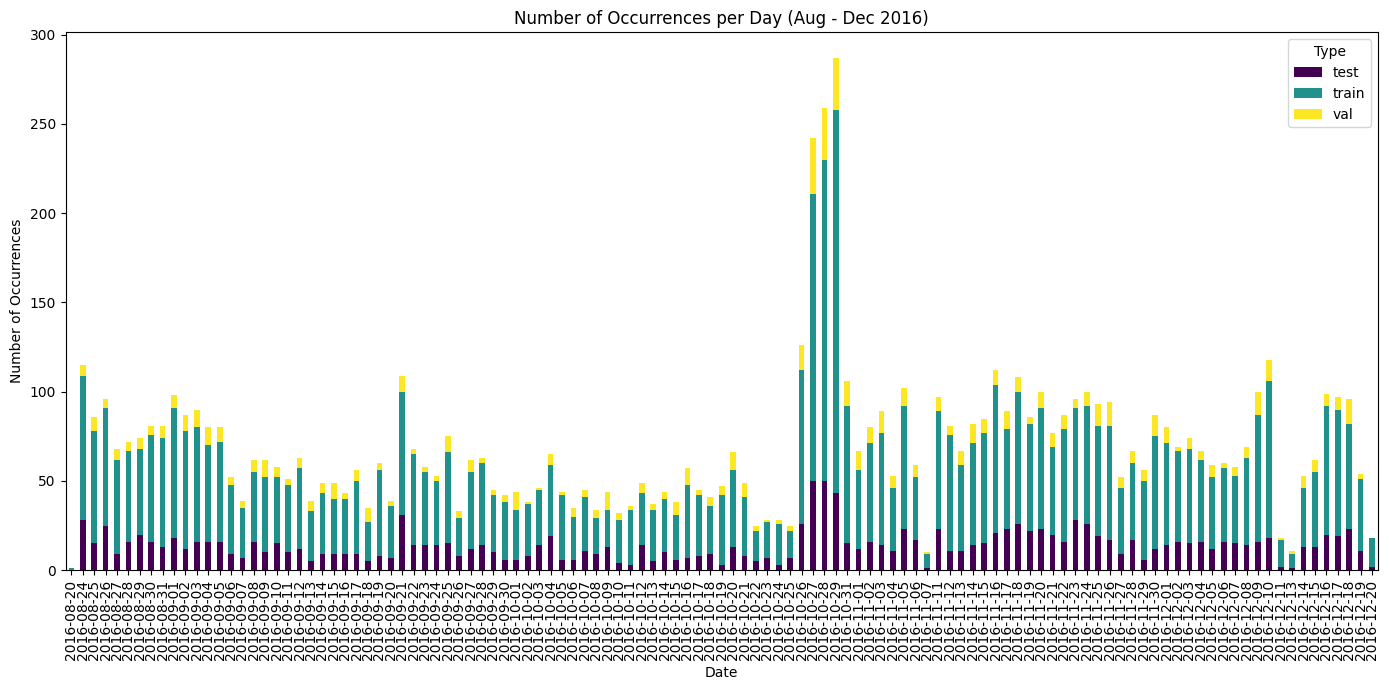

In [3]:
# datasets['train']['occurence_time']
train_occurence_time = datasets['train']['occurence_time']
val_occurence_time = datasets['val']['occurence_time']
test_occurence_time = datasets['test']['occurence_time']



# Combine all timestamps into a DataFrame
train_df = pd.DataFrame(train_occurence_time, columns=['timestamp'])
train_df['type'] = 'train'
val_df = pd.DataFrame(val_occurence_time, columns=['timestamp'])
val_df['type'] = 'val'
test_df = pd.DataFrame(test_occurence_time, columns=['timestamp'])
test_df['type'] = 'test'

# Concatenate all data
df = pd.concat([train_df, val_df, test_df])

# Extract the date part and count occurrences
df['date'] = df['timestamp'].dt.date
occurrences = df.groupby(['date', 'type']).size().unstack(fill_value=0)

# Plotting
occurrences.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences per Day (Aug - Dec 2016)')
plt.legend(title='Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [7]:
from seisLM.data_pipeline.foreshock_aftershock_dataloaders import (
  # create_foreshock_aftershock_dataloaders,
  prepare_foreshock_aftershock_dataloaders
)


In [8]:
loaders = prepare_foreshock_aftershock_dataloaders(
  num_classes=2,
  batch_size=32,
  event_split_method='temporal'
)


Seed set to 42
Seed set to 42


In [9]:
batch = next(iter(loaders['train']))

In [11]:
X, y = batch


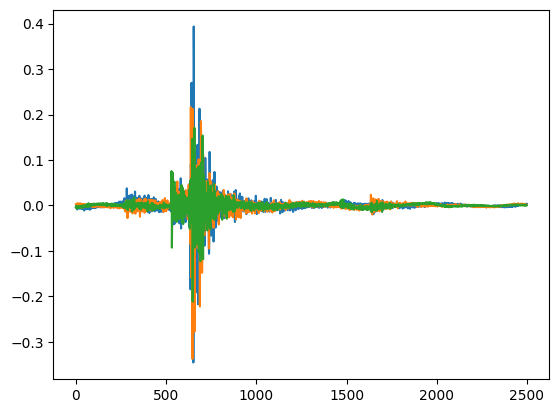

In [15]:
plt.plot(X[0].T)
